In [42]:
import keras
from keras.models import Sequential
from keras.layers import (
    Dense, Conv1D, MaxPooling1D, Dropout, Activation
)
from keras.optimizers import Adam
from keras.layers.core import Flatten

import numpy as np
import pandas as pd
# from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from oandaapi import get_exrate_as_df

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = get_exrate_as_df(instrument='EUR_USD', from_='2015-03-01', to='2019-03-01')

In [3]:
print(len(df))
df.tail()

1040


,open,high,low,close,volume
time,,,,,
2019-02-24 22:00:00,1.13359,1.13675,1.13286,1.13574,13830.0
2019-02-25 22:00:00,1.13616,1.14028,1.13453,1.13892,17286.0
2019-02-26 22:00:00,1.13894,1.14036,1.13624,1.13695,16900.0
2019-02-27 22:00:00,1.13673,1.14197,1.13596,1.13706,20344.0
2019-02-28 22:00:00,1.13706,1.14086,1.13532,1.13648,17278.0


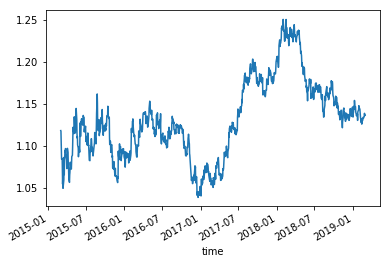

In [15]:
df['close'].plot()
plt.show()

In [36]:
mean = df['close'].mean()
std = df['close'].std()

In [38]:
normed_data = np.array((df['close'] - mean) / std)
normed_data

array([-0.28581342, -0.30120335, -0.50918126, ...,  0.11154622,
        0.11389746,  0.10150001])

In [23]:
DATA_LENGTH = len(normed_data)
LEARNING_SPAN = 20
SLIDE = 1

In [30]:
X, y = [], []
for i in range(LEARNING_SPAN, DATA_LENGTH-1, SLIDE):
    X.append(normed_data[i-LEARNING_SPAN:i])
    y.append(normed_data[i+1])
X = np.array(X)
y = np.array(y)

In [142]:
train_size = int(0.6 * DATA_LENGTH)
random_seed = 1
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=test_size, random_state=random_seed
#     )
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [143]:
X_train = X_train.reshape((-1, LEARNING_SPAN, 1))
y_train = y_train.reshape((-1, 1))

X_test = X_test.reshape((-1, LEARNING_SPAN, 1))
y_test = y_test.reshape((-1, 1))

In [144]:
input_shape = (LEARNING_SPAN, 1)

model = Sequential()
model.add(Conv1D(
    32, 3, activation='relu', padding='valid',
    input_shape=input_shape
))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64,
                 3,
                 activation='relu',
                 padding='valid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [145]:
epoch = 100
batch_size = 200
history = model.fit(X_train, y_train, epochs=epoch,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

Train on 624 samples, validate on 395 samples
Epoch 1/100
624/624 [==============================] - 1s 2ms/step - loss: 0.9865 - acc: 0.0000e+00 - val_loss: 0.7627 - val_acc: 0.0000e+00
Epoch 2/100
624/624 [==============================] - 0s 88us/step - loss: 0.2486 - acc: 0.0000e+00 - val_loss: 0.4642 - val_acc: 0.0000e+00
Epoch 3/100
624/624 [==============================] - 0s 83us/step - loss: 0.2291 - acc: 0.0000e+00 - val_loss: 0.0842 - val_acc: 0.0000e+00
Epoch 4/100
624/624 [==============================] - 0s 90us/step - loss: 0.1885 - acc: 0.0000e+00 - val_loss: 0.5197 - val_acc: 0.0000e+00
Epoch 5/100
624/624 [==============================] - 0s 112us/step - loss: 0.1608 - acc: 0.0000e+00 - val_loss: 0.6584 - val_acc: 0.0000e+00
Epoch 6/100
624/624 [==============================] - 0s 109us/step - loss: 0.1626 - acc: 0.0000e+00 - val_loss: 0.1822 - val_acc: 0.0000e+00
Epoch 7/100
624/624 [==============================] - 0s 119us/step - loss: 0.1430 - acc: 0.0000e+00

Epoch 58/100
624/624 [==============================] - 0s 114us/step - loss: 0.0803 - acc: 0.0000e+00 - val_loss: 0.1155 - val_acc: 0.0000e+00
Epoch 59/100
624/624 [==============================] - 0s 116us/step - loss: 0.0746 - acc: 0.0000e+00 - val_loss: 0.0558 - val_acc: 0.0000e+00
Epoch 60/100
624/624 [==============================] - 0s 112us/step - loss: 0.0745 - acc: 0.0000e+00 - val_loss: 0.0692 - val_acc: 0.0000e+00
Epoch 61/100
624/624 [==============================] - 0s 109us/step - loss: 0.0776 - acc: 0.0000e+00 - val_loss: 0.0618 - val_acc: 0.0000e+00
Epoch 62/100
624/624 [==============================] - 0s 118us/step - loss: 0.0742 - acc: 0.0000e+00 - val_loss: 0.0584 - val_acc: 0.0000e+00
Epoch 63/100
624/624 [==============================] - 0s 116us/step - loss: 0.0732 - acc: 0.0000e+00 - val_loss: 0.0829 - val_acc: 0.0000e+00
Epoch 64/100
624/624 [==============================] - 0s 88us/step - loss: 0.0737 - acc: 0.0000e+00 - val_loss: 0.0576 - val_acc: 0.00

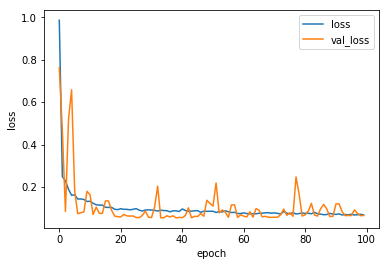

In [146]:
plt.plot(range(epoch), history.history['loss'], label='loss')
plt.plot(range(epoch), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()

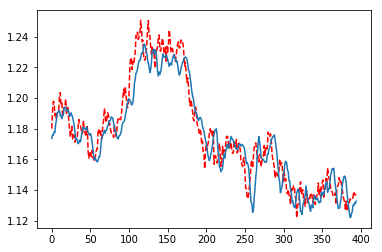

In [147]:
prediction = model.predict(X_test)
plt.plot( y_test * std+mean ,label='real price', color='r', linestyle='--')
plt.plot(prediction * std +mean, label='predicted price' )
plt.show()
# plt.legend()